<a href="https://colab.research.google.com/github/Kubania/Crop-Yield-Outcome-Production/blob/master/Group_3_Crop_Yield_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3 project


## Defining the analytic question

### a. Specifying the research questions
1.	To predict the outcome of the harvest season; whether crops will be alive, damaged by pesticides or damaged by other reasons.
2.	To establish the top factors that determine crop yield.
3.	To find out which crops were most susceptible to damage by pesticides/ damage by other reasons.
4.	To find out which seasons were the best to apply pesticides.
5.	To determine the relationship between soil type and crop damage.
6.	To determine crop yields that experience damage when pesticides are used frequently.
7.	To find out crop yield that had status alive when pesticides were used vs. never used.
8.	To find out whether the season of planting affects the number of insects as well as the pesticides used.
9.	To determine whether the number of weeks pesticides were used/ quit affect the crop yield.
10.	To evaluate the optimal doses of pesticides.
11.	To determine the optimal duration of use of pesticides. 


### b. Defining the metrics of success

### c. Understanding the context

###d. Recording the experimental design

###e. Data relevance

## Importing the libraries

In [ ]:
# Importing all libraries required for analysis
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [ ]:
# Loading the data and previewing the first 5 rows 
df= pd.read_csv('train.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


## Checking the data

In [ ]:
# Checking the shape of our data
df.shape


(88858, 10)

Our data has 88,858 rows and 10 columns

In [ ]:
# Checking for infomation about a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


Our data has no null values, except in Number_Weeks_Used column

The datatypes include integers, objects and float

In [ ]:
# Checking summary statistics of our data

df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


## Cleaning the dataset


In [ ]:
# We start by checking for missing values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Our output indicates that there are no missing values expect in the Number_Weeks_Used column which has 9000 missing values


In [ ]:
#predicting missing values using the InterativeImputer from the fancyinpute library
# we need to remove categorical columns

df_new = df.drop(['ID'], axis=1)

from fancyimpute import IterativeImputer as MICE

data_fit = pd.DataFrame(MICE().fit_transform(df_new))

data_fit.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0

,0,1,2,3,4,5,6,7,8
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
# previewing the new data
data_fit.head()

,0,1,2,3,4,5,6,7,8
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
# renaming the columns

data_fit = data_fit.set_axis(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 
                   'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Crop_Damage'], axis=1, inplace=False)

data_fit.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
# checking for duplicates
data_fit.duplicated().sum()


1243

In [ ]:
# removing the duplicates
data_fit.drop_duplicates().all()

Estimated_Insects_Count     True
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category      True
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                      True
Crop_Damage                False
dtype: bool

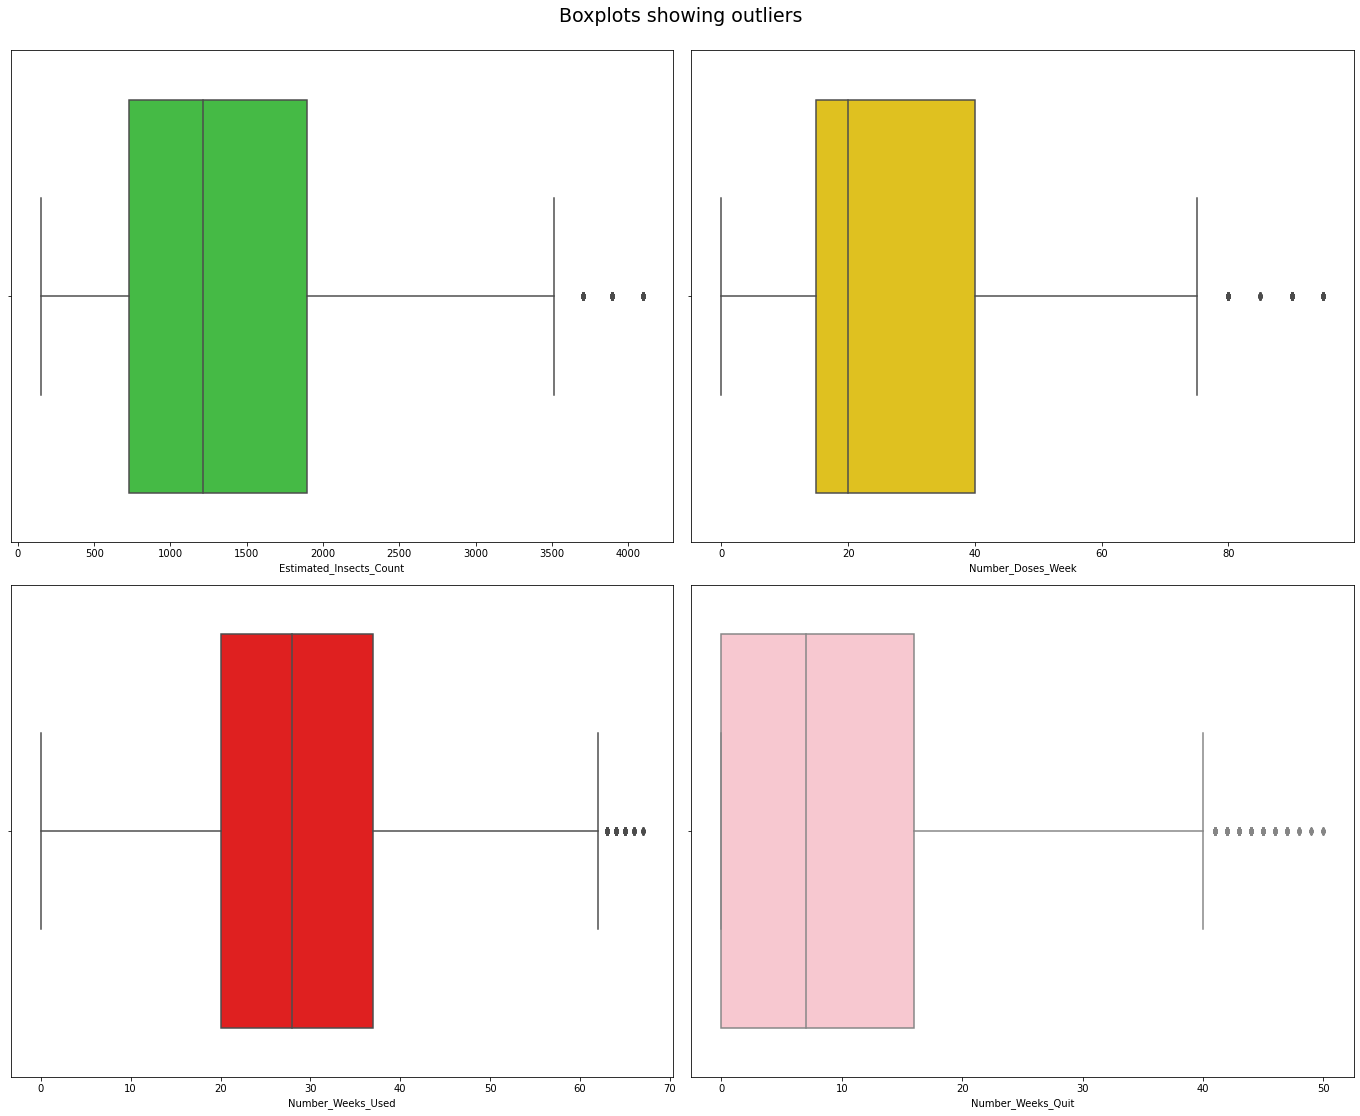

In [ ]:
# checking for outliers
fig, axes = plt.subplots(nrows =2, ncols = 2, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'pink']
columns = ['Estimated_Insects_Count',	'Number_Doses_Week',	'Number_Weeks_Used',	'Number_Weeks_Quit']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), df, columns, colors):
    sns.boxplot(data_fit[column], ax = ax, color = color)
plt.tight_layout()

Outlier ranges for Taken Cars.
 [[3895.0, 4096.0, 3702.0, 3702.0, 3702.0, 3896.0, 3702.0, 3895.0, 3896.0, 3895.0, 4096.0, 4096.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3895.0, 3895.0, 3895.0, 3895.0, 3895.0, 3895.0, 3896.0, 4096.0, 4096.0, 3702.0, 3895.0, 3896.0, 3895.0, 4096.0, 4097.0, 3895.0, 3896.0, 4096.0, 3702.0, 3702.0, 3702.0, 3895.0, 4096.0, 3896.0, 3895.0, 3895.0, 3896.0, 4096.0, 4096.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3896.0, 3895.0, 3895.0, 3895.0, 4096.0, 4096.0, 4096.0, 4096.0, 4097.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3896.0, 3895.0, 3896.0, 3896.0, 3895.0, 3895.0, 4097.0, 4096.0, 3895.0, 3895.0, 3895.0, 4097.0, 4096.0, 3702.0, 3702.0, 3702.0, 3895.0, 4096.0, 4097.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3702.0, 3895.0, 3895.0, 3895.0, 3895.0, 3896.0, 3896.0, 3895.0, 4096.0, 4096.0, 4096.0, 4096.0, 4096.0, 3702.0, 3702.0, 3702.0, 3702.0

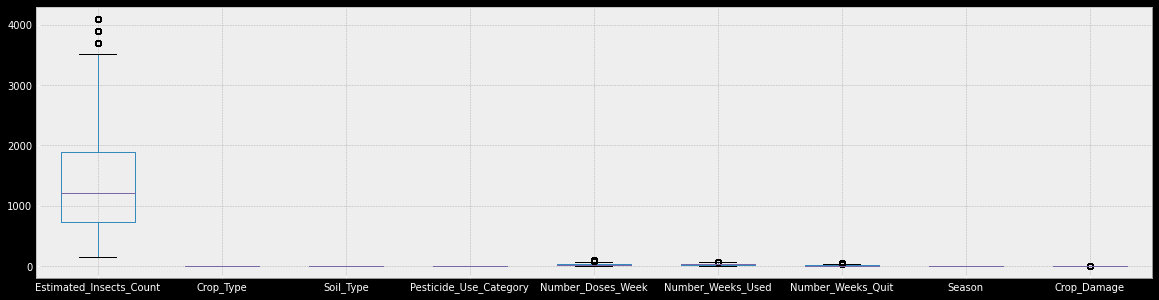

In [ ]:
plt.style.use('dark_background')
plt.style.use('bmh')
plt.figure(figsize=(20,5))

# OUTLIERS : Checking for Outliers by plotting a visual

_t, df_outliers = pd.DataFrame.boxplot(data_fit, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]


print("Outlier ranges for Taken Cars.\n", out_liers)

In [ ]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in data_fit:
    rows, columns = data_fit.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(data_fit[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

Estimated_Insects_Count has 356 outliers in total, which is 0.4% of data
Crop_Type has 0 outliers in total, which is 0.0% of data
Soil_Type has 0 outliers in total, which is 0.0% of data
Pesticide_Use_Category has 0 outliers in total, which is 0.0% of data
Number_Doses_Week has 857 outliers in total, which is 0.96% of data
Number_Weeks_Used has 25 outliers in total, which is 0.028% of data
Number_Weeks_Quit has 476 outliers in total, which is 0.54% of data
Season has 0 outliers in total, which is 0.0% of data
Crop_Damage has 2313 outliers in total, which is 2.6% of data
